In [108]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [56]:
# Loading the dataset
df=pd.read_csv('Tesla.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3162 non-null   object 
 1   Open       3162 non-null   float64
 2   High       3162 non-null   float64
 3   Low        3162 non-null   float64
 4   Close      3162 non-null   float64
 5   Adj Close  3162 non-null   float64
 6   Volume     3162 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 173.1+ KB


In [58]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29/06/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,30/06/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,01/07/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,02/07/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,06/07/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [59]:
# Converting data to date-time format
df['Date']=pd.to_datetime(df['Date'])

C:\Users\megha\AppData\Local\Temp\ipykernel_20036\77449805.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])


In [60]:
df['Date']

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3157   2023-01-12
3158   2023-01-13
3159   2023-01-17
3160   2023-01-18
3161   2023-01-19
Name: Date, Length: 3162, dtype: datetime64[ns]

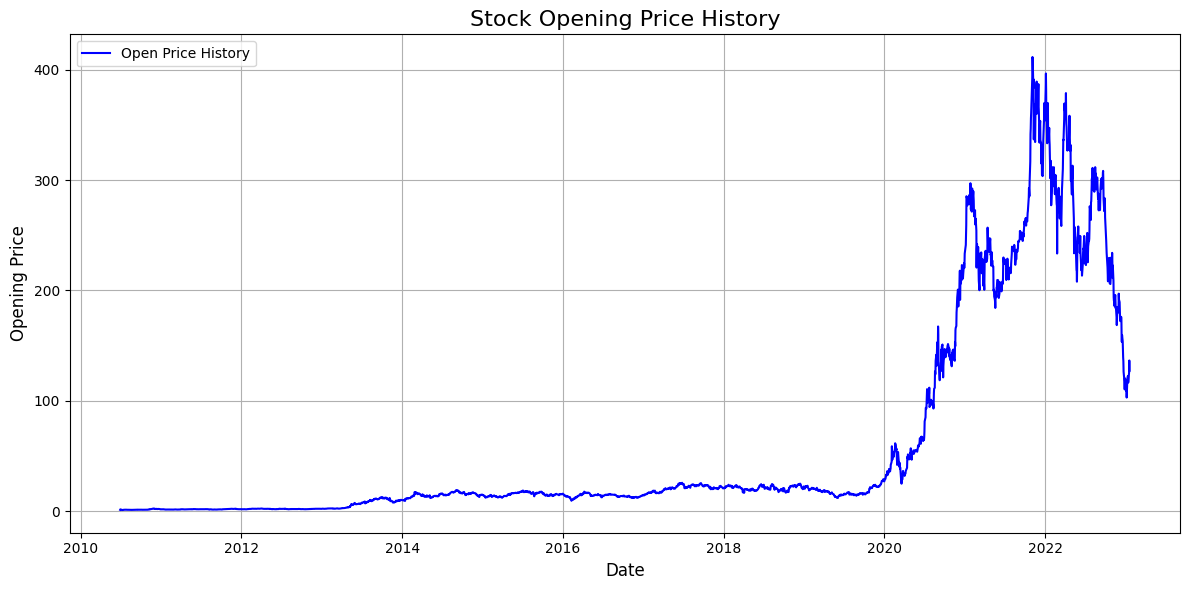

In [90]:
# Plotting Stock Opening Price History
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open Price History', color='blue')
plt.title('Stock Opening Price History', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Opening Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

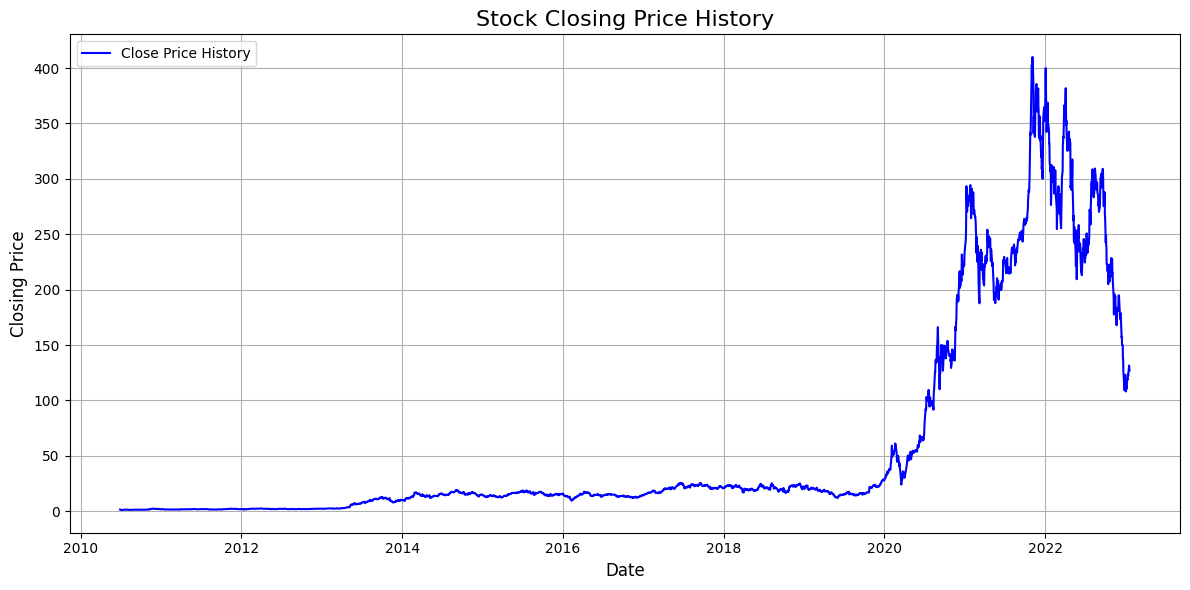

In [91]:
# Plotting Stock Closing Price History
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price History', color='blue')
plt.title('Stock Closing Price History', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

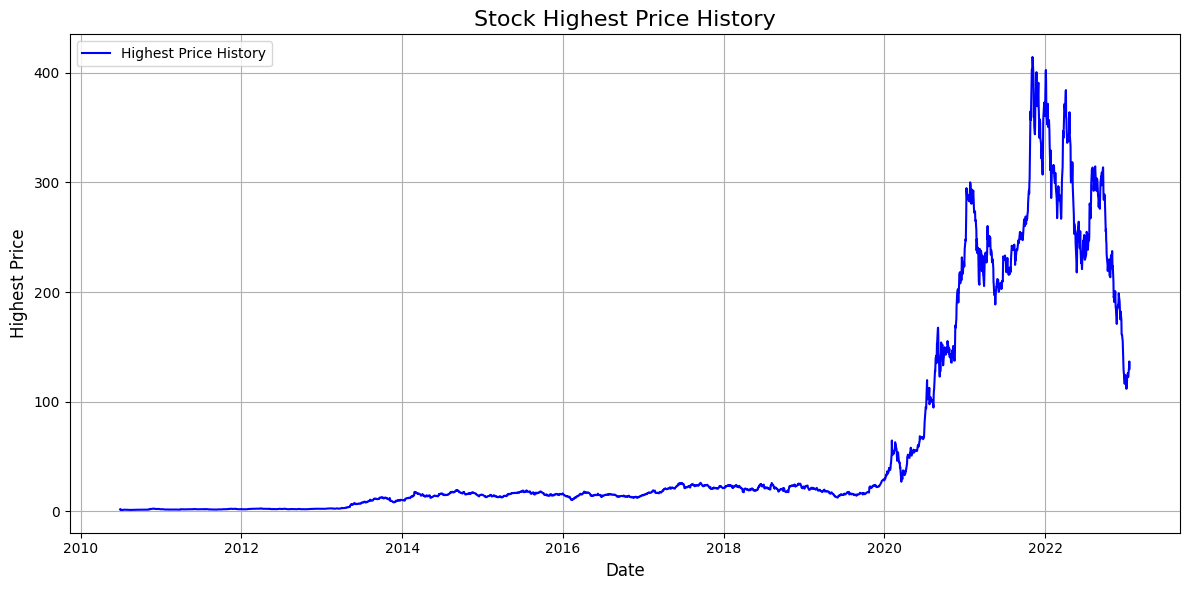

In [92]:
# Plotting Stock Highest Price History
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High'], label='Highest Price History', color='blue')
plt.title('Stock Highest Price History', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Highest Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

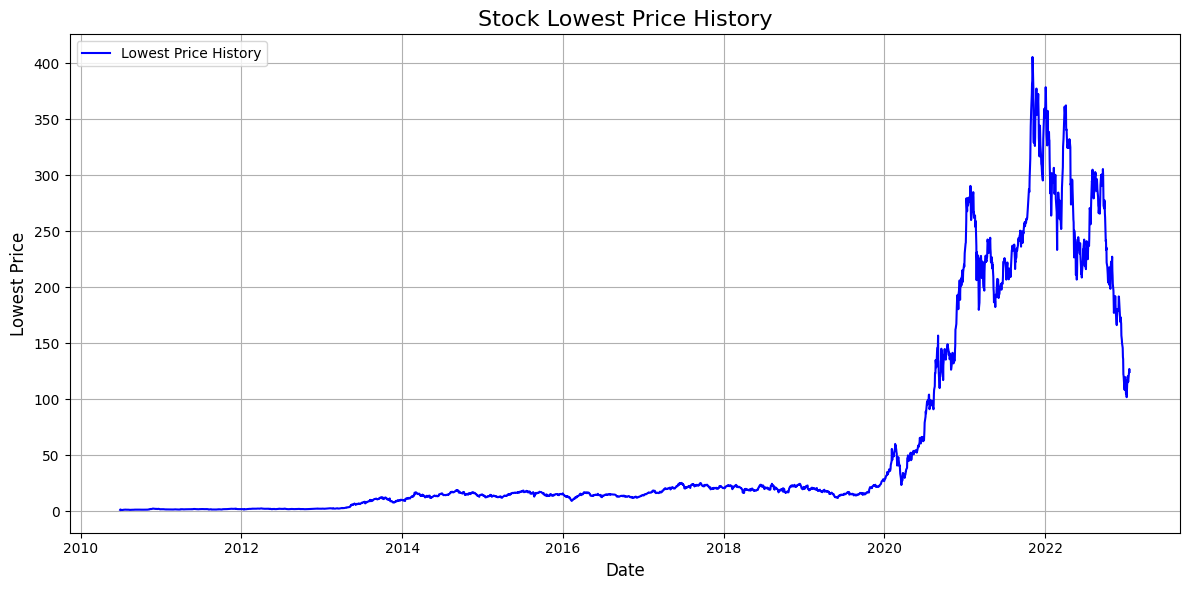

In [93]:
# Plotting Stock Lowest Price History
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Low'], label='Lowest Price History', color='blue')
plt.title('Stock Lowest Price History', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Lowest Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
# Printing the maximum value in each column
print("Maximum Opening Value of Stock : ",df['Open'].max())
print("Maximum Highest Value of Stock : ",df['High'].max())
print("Maximum Lowest Value of Stock  : ",df['Low'].max())
print("Maximum Closing Value of Stock : ",df['Close'].max())

Maximum Opening Value of Stock :  411.470001
Maximum Highest Value of Stock :  414.496674
Maximum Lowest Value of Stock  :  405.666656
Maximum Closing Value of Stock :  409.970001


In [97]:
# Printing the lowest value in each column
print("Minimum Opening Value of Stock : ",df['Open'].min())
print("Minimum Highest Value of Stock : ",df['High'].min())
print("Minimum Lowest Value of Stock  : ",df['Low'].min())
print("Minimum Closing Value of Stock : ",df['Close'].min())

Minimum Opening Value of Stock :  1.076
Minimum Highest Value of Stock :  1.108667
Minimum Lowest Value of Stock  :  0.998667
Minimum Closing Value of Stock :  1.053333


In [98]:
# Feature Engineering
df['Day_of_Week']=df['Date'].dt.dayofweek # It returns the day of the week from the date given to us; 0-mon, 1-tues,etc.
df['Weekday']=df['Date'].apply(lambda x: 1 if x.dayofweek < 5 else 0) # It is used to differentiate between weekday and weekend.

In [99]:
# Drop rows with NaN values
df.dropna(inplace=True)

In [100]:
# Split the dataset into features(x) and target variable(y)
x=df.drop(['Date','Close'], axis=1) # Everything except date and close will form the input to our ML Model; axis =1 means that we are dropping cols and not rows.
y=df['Close'] # It is basically what we are trying to predict.

In [101]:
features=['Open','High','Low','Volume','Day_of_Week','Weekday']
target='Close'

In [102]:
# Split the data into training and testing data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [103]:
# Feature Scaling
sc=StandardScaler() # This helps to prevent features with larger values from dominating the learning process
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [104]:
# Train the model
model=RandomForestRegressor(n_estimators=100 # Build 100 decision trees to make accurate predictions
                            , random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [105]:
# Make Predictions
# y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [106]:
# Evaluate the model
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
print("Train MSE: ",mse_train)
print("Test MSE: ",mse_test)

Train MSE:  0.06306539262447751
Test MSE:  0.2366684546043044


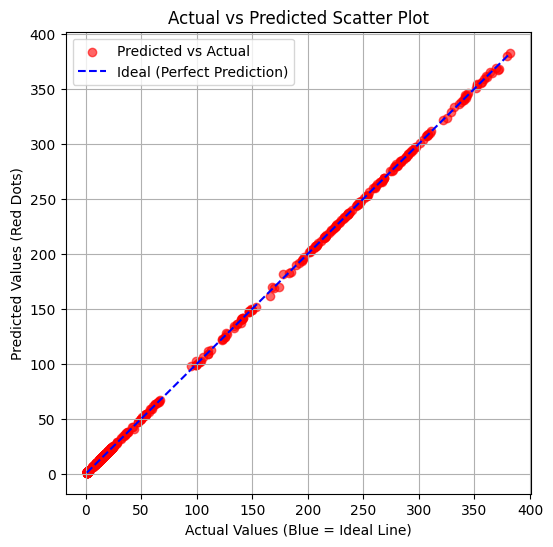

In [107]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, c='red', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', label='Ideal (Perfect Prediction)')
plt.xlabel('Actual Values (Blue = Ideal Line)')
plt.ylabel('Predicted Values (Red Dots)')
plt.title('Actual vs Predicted Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()
